In [ ]:
import os
import sys
!pip install numpy --quiet
!pip install pandas --quiet
!pip install seaborn --quiet
!pip install torch --quiet
!pip install scikit-learn --quiet
!pip install matplotlib --quiet
!pip install pandas mysql-connector-python --quiet
!pip install pandas pymysql --quiet
!pip install sqlalchemy --quiet

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




In [4]:
import pandas as pd
from sqlalchemy import create_engine

# Assuming connection_url is available
db_connection = create_engine(connection_url)

# Replace 'my_table' with your actual table name
query = "SELECT * FROM `winequality-red`;"
dataframe = pd.read_sql(query, db_connection)
df = dataframe.copy()

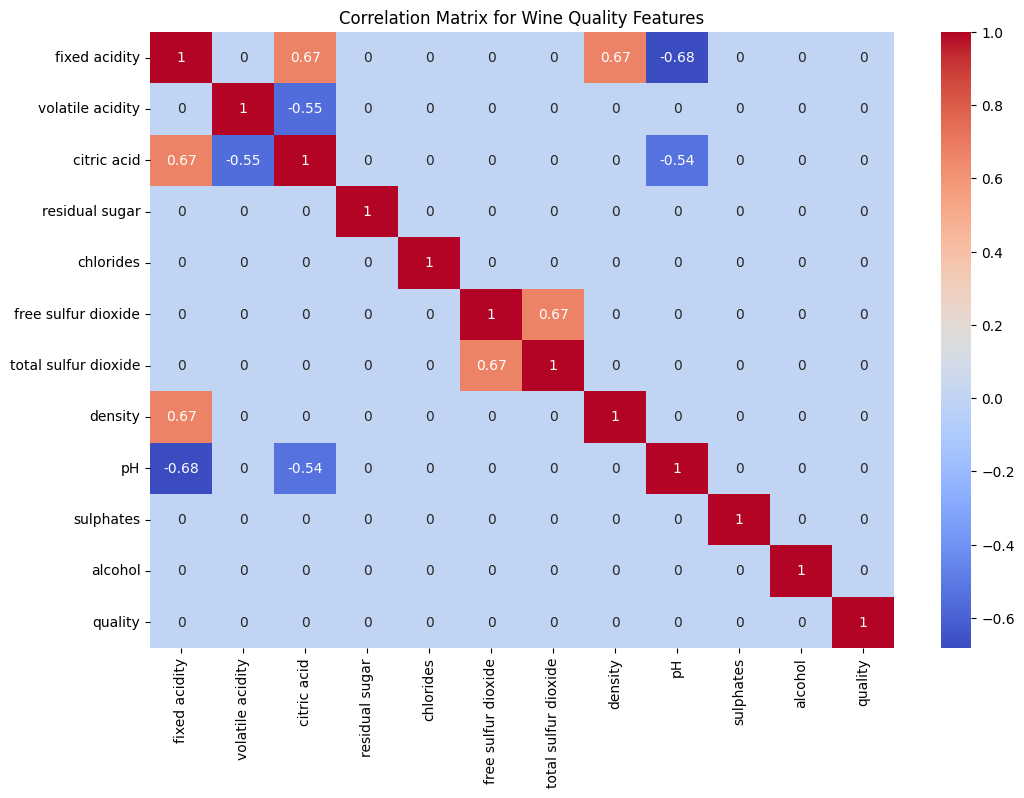

[('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH'), ('free sulfur dioxide', 'total sulfur dioxide')]


In [5]:
correlation_matrix = df.corr()
high_corr_list = []

quality_corr = correlation_matrix['quality'].iloc[:-1].copy()

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i].iloc[j]) < 0.5:
            correlation_matrix.iloc[i].iloc[j] = 0
        else:
            if i<j:
                high_corr_list.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Wine Quality Features')
plt.show()
print(high_corr_list)

In [6]:
df.quality

Mystic Sun           5
Cosmic Echo          5
Silver Whisper       5
Spicy Park           6
Celestial Flame      5
                    ..
Silent Expedition    5
Cosmic Flame         6
Ruby Comet           6
Summer Leaf          5
Enchanted Dream      6
Name: quality, Length: 1571, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

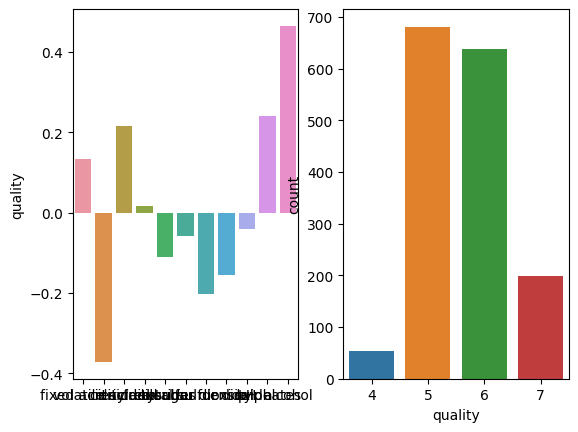

In [7]:
plt.subplot(1, 2, 1)
sns.barplot(y = quality_corr, x = quality_corr.index)
plt.subplot(1, 2, 2)
sns.countplot(df, x = "quality")

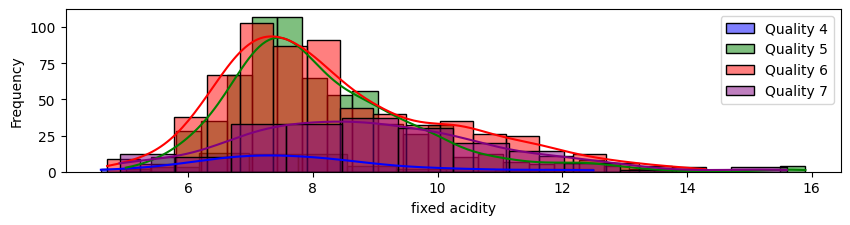

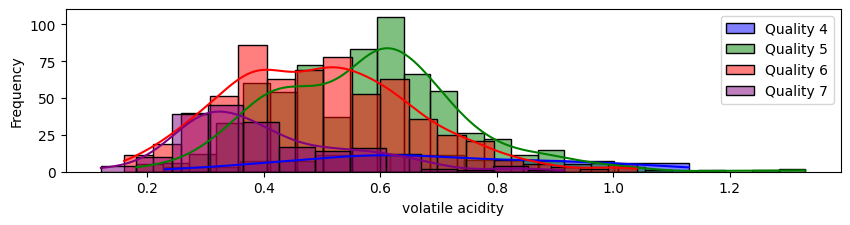

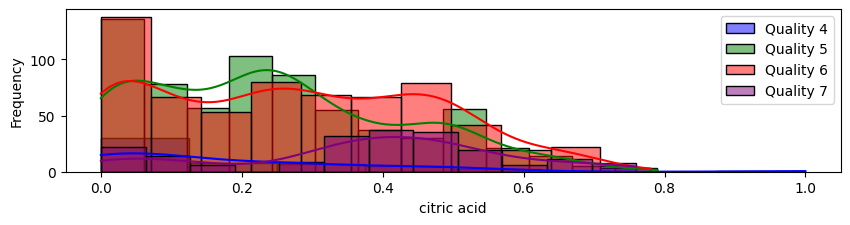

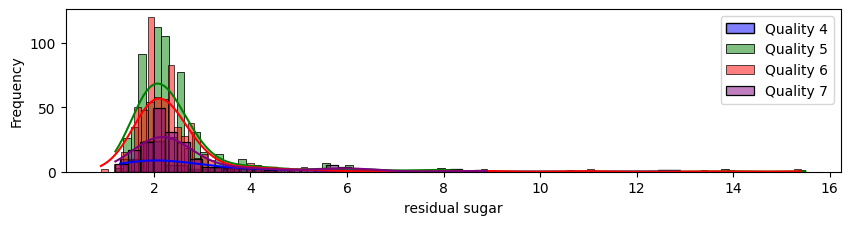

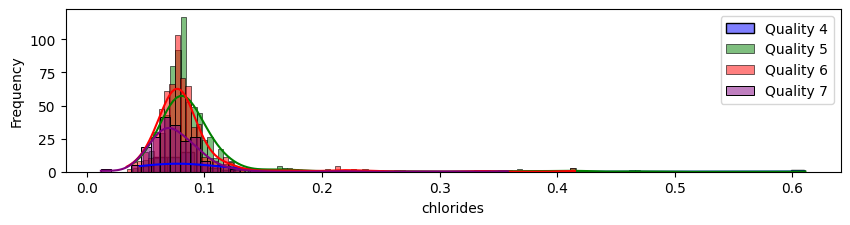

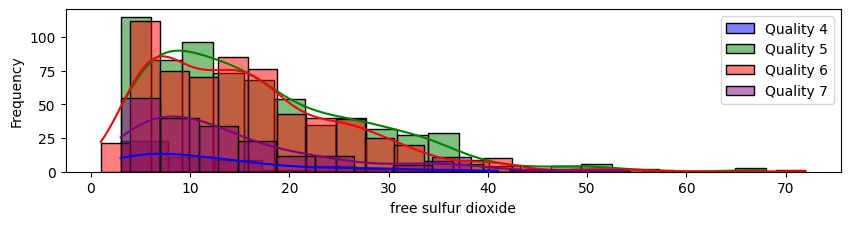

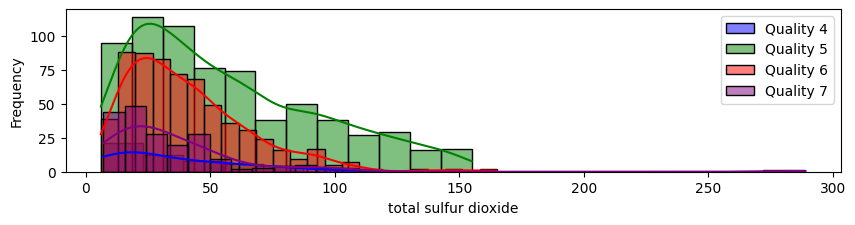

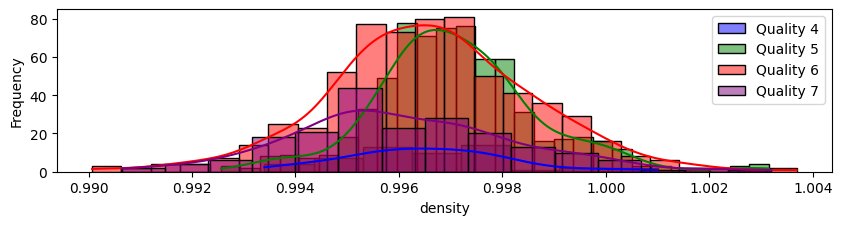

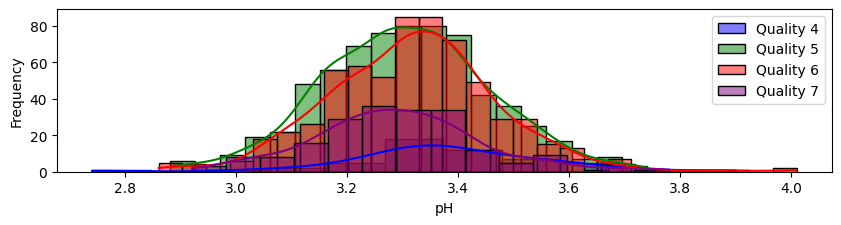

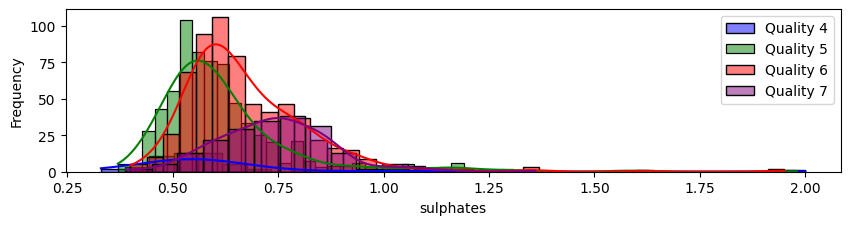

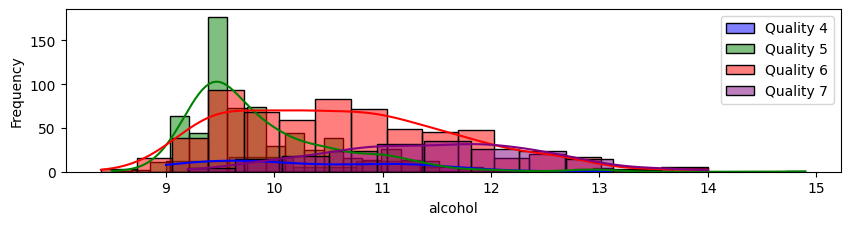

In [8]:
for i in range(11):
    var = df.columns[i]
    plt.figure(figsize=(10, 30))  # Set the size of the plot
    plt.subplot(12, 1, i+1)
    sns.histplot(df[df.quality == 4][var], label='Quality 4', kde=True, color='blue', alpha=0.5)
    sns.histplot(df[df.quality == 5][var], label='Quality 5', kde=True, color='green', alpha=0.5)
    sns.histplot(df[df.quality == 6][var], label='Quality 6', kde=True, color='red', alpha=0.5)
    sns.histplot(df[df.quality == 7][var], label='Quality 7', kde=True, color='purple', alpha=0.5)

    plt.xlabel(f'{var}')
    plt.ylabel('Frequency')
    plt.legend()  # Add a legend to distinguish between the histograms

    plt.show()

In [19]:
# Preparing the dataset
label_encoder = LabelEncoder()

df = pd.read_csv("winequality-red.csv")
df = df.query('quality != 3 and quality != 8')

X = df.drop('quality', axis=1).values
y = df['quality'].values
y = label_encoder.fit_transform(df['quality'])


# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the neural network
class Net(nn.Module):
    def __init__(self, size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(11, size)  # 11 input features
        self.fc2 = nn.Linear(size, size)
        self.fc3 = nn.Linear(size, len(np.unique(y)))
        self.residual = nn.Linear(size, size)  # Residual connection
        self.drop = nn.Dropout(0.7)

    def forward(self, x):
        x = self.drop(torch.relu(self.fc1(x)))

        x = self.drop(torch.relu(self.fc2(x)))

        identity = self.residual(x)
        x = x + identity
        x = self.drop(torch.relu(self.fc2(x)))

        x = self.drop(torch.relu(self.fc2(x)))

        
        x = self.fc3(x)
        return x
    



epoch: 499 loss: 0.3082099934812432
epoch: 999 loss: 0.12869953718887744
epoch: 1499 loss: 0.04886982686149238
epoch: 1999 loss: 0.022430720573443166
epoch: 2499 loss: -0.001372909802025931
epoch: 2999 loss: -0.01686619129487238
epoch: 3499 loss: -0.02901285163691986
epoch: 3999 loss: -0.03802065169296165
epoch: 4499 loss: -0.04518541855897016
epoch: 4999 loss: -0.05169650383777846
epoch: 5499 loss: -0.05769476243600678
epoch: 5999 loss: -0.06529340397170746
epoch: 6499 loss: -0.07111255013755649
epoch: 6999 loss: -0.07651698262114047
epoch: 7499 loss: -0.08264081107454639
epoch: 7999 loss: -0.09062769097719671
epoch: 8499 loss: -0.0965205716094441
epoch: 8999 loss: -0.10014933327041034
epoch: 9499 loss: -0.1040079946806502
epoch: 9999 loss: -0.10977747649966162
epoch: 10499 loss: -0.11555012977053589
epoch: 10999 loss: -0.11997644805496498
epoch: 11499 loss: -0.1259523312915635
epoch: 11999 loss: -0.12885258016395953
epoch: 12499 loss: -0.13566761437270483
epoch: 12999 loss: -0.138744

<Axes: >

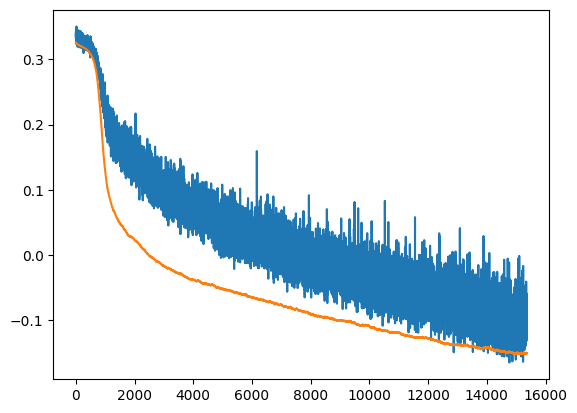

In [25]:
model = Net(256)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
# criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training the model
num_epochs = 20000  # You can adjust this
training_loss = []
val_loss = []
earlystop = 0
min = 100

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.long())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    training_loss.append(np.log(running_loss / len(train_loader)))
    # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


    model.eval()
    val_running_loss = 0.0
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        valloss = criterion(val_outputs.squeeze(), val_labels.long())
        val_running_loss += valloss.item()
    val_loss.append(np.log(val_running_loss / len(val_loader)))

    if val_loss[-1] > min:
        earlystop += 1
    else:
        earlystop = 0
        min = val_loss[-1]
    if earlystop >= 400:
        break
    if epoch % 500 == 499:
        print("epoch:", epoch, "loss:", val_loss[-1])


print(val_loss[-1])
sns.lineplot(training_loss)
sns.lineplot(val_loss)

In [57]:
df['pH'].mean()

3.311063017186505

In [40]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
# new_w = torch.Tensor([1, 1, 1.4, 1])

with torch.no_grad():  # Inference without gradient calculation
    correct = 0
    total = 0
    p = []
    o = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        p += predicted
        o += labels

    accuracy = 100 * correct / total
    pm_accuracy = 100 * (confusion_matrix(o, p)[0,0] + confusion_matrix(o, p)[0,1] + confusion_matrix(o, p)[1, 1] + confusion_matrix(o, p)[1,0] + confusion_matrix(o, p)[1,2] + confusion_matrix(o, p)[2,1] + confusion_matrix(o, p)[2,2] + confusion_matrix(o, p)[2,3] + confusion_matrix(o, p)[3,2] + confusion_matrix(o, p)[3,3])/len(p)
    b_accuracy = 100 * (confusion_matrix(o, p)[0,0] + confusion_matrix(o, p)[0,1] + confusion_matrix(o, p)[1, 1] + confusion_matrix(o, p)[1,0] + confusion_matrix(o, p)[2,2] + confusion_matrix(o, p)[2,3] + confusion_matrix(o, p)[3,2] + confusion_matrix(o, p)[3,3])/len(p)
    print(f'Accuracy of the model on the test set: {accuracy:.2f}%')
    print(f'Accuracy(+-1) of the model on the test set: {pm_accuracy:.2f}%')
    print(f'Accuracy(Binary) of the model on the test set: {b_accuracy:.2f}%')
    print(confusion_matrix(o,p))


Accuracy of the model on the test set: 57.32%
Accuracy(+-1) of the model on the test set: 0.96%
Accuracy(Binary) of the model on the test set: 0.76%
[[ 5  1  1  0]
 [ 7 37 16  1]
 [ 5 15 25 16]
 [ 0  0  5 23]]


In [41]:
torch.save(model.state_dict(), '../myapp/model.pth')

In [508]:
def permutation_importance(model, X_val, y_val, metric=accuracy_score):
    # Store the original metric
    baseline_metric = metric(np.argmax(model(X_val).detach().numpy(), 1), y_val.numpy())
    # print(len(np.max(model(X_val).detach().numpy(), 1)), len(y_val.numpy()))
    importance = {}

    for i, column in enumerate(df.columns[:-1]):  # Assuming the last column is the target
        X_val_permuted = X_val.clone().detach()
        X_val_permuted[:, i] = X_val_permuted[:, i][torch.randperm(len(X_val_permuted))]
        
        # Measure performance with the permuted data
        permuted_metric = metric(np.argmax(model(X_val_permuted).detach().numpy(), 1), y_val.numpy())
        
        # The importance is the decrease in model performance
        importance[column] = baseline_metric - permuted_metric

    return importance


<Axes: >

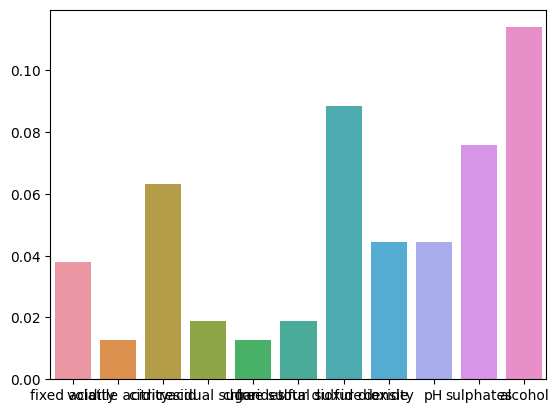

In [509]:
importance = permutation_importance(model, X_val_tensor, y_val_tensor)
sns.barplot(x = list(importance.keys()), y = list(importance.values()))